<a href="https://colab.research.google.com/github/rajiv-ranjan/cds-mini-projects/blob/Archana/M3_NB_MiniProject_1_Image_Classification_MLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Advanced Certification Program in Computational Data Science

##  A program by IISc and TalentSprint

### Mini Project Notebook: Image Classification using Multi Layer Perceptron

## Learning Objectives

At the end of the experiment, you will be able to :

* load and extract features of images

* implement the Multi-Layer perceptron to classify images

* implement simple neural network from keras

## Introduction

Traffic sign recognition is a challenging, real-world problem relevant for AI based transportation systems. Traffic signs show a wide range of variations between classes in terms of color, shape, and the presence of pictograms or text. However, there exist subsets of
classes (e.g., speed limit signs) that are very similar to each other. Further, the classifier
has to be robust against large variations in visual appearances due to changes in illumination, partial
occlusions, rotations, weather conditions etc. Using a comprehensive traffic sign detection dataset, here we will perform classification of traffic signs, train and evaluate the different models and compare to the performance of MLPs.

![img](https://paperswithcode.com/media/datasets/GTSRB-0000000633-9ce3c5f6_Dki5Rsf.jpg)

## Dataset

The data for this mini-project is from the German Traffic Sign Detection Benchmark [GTSDB](https://benchmark.ini.rub.de/gtsdb_dataset.html). This archive contains the training set used during the IJCNN 2013 competition.

The German Traffic Sign Detection Benchmark is a single-image detection assessment for researchers with interest in the field of computer vision, pattern recognition and image-based driver assistance. It is introduced on the IEEE International Joint Conference on Neural Networks 2013.

It features ...

* The main archive FullIJCNN2013.zip includes the images (1360 x 800 pixels) in PPM format, the image sections containing only the traffic signs
* A file in CSV format with the ground truth
* A ReadMe.txt with more details.

Note that we will be using the images inside the image sections subfolders, containing only the traffic signs.

## Problem Statement

To build and improve upon a machine learning model for the classification of images and achieve a high accuracy final model.

## Grading = 10 Points

In [1]:
#@title Download the data
!wget -qq https://sid.erda.dk/public/archives/ff17dc924eba88d5d01a807357d6614c/FullIJCNN2013.zip
!unzip -qq FullIJCNN2013.zip

### Import Required packages

In [6]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPClassifier
from skimage.io import imread, imshow
from sklearn import preprocessing
from collections import Counter
import os, glob
from PIL import Image
from sklearn.model_selection import GridSearchCV
# Keras
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, BatchNormalization

### Data Loading and Feature Extraction (2 points)

#### Get the features and labels of data

* Extract the features of the images within image sections only (do not use images located outside these folders)
* Extract labels of the images
* Resize the images to (30, 30) and convert to numpy 1-D array

   Hint: [Link](https://machinelearningmastery.com/how-to-load-and-manipulate-images-for-deep-learning-in-python-with-pil-pillow/)

In [9]:
# extract the features of the images within image sections
def load_data(image_path, image_size=(30, 30)):
    features = []
    labels = []

    for label in os.listdir(image_path):
        class_folder = os.path.join(image_path, label)

        if os.path.isdir(class_folder):
            for file in os.listdir(class_folder):
                file_path = os.path.join(class_folder, file)

                # Open and process the image using Pillow
                img = Image.open(file_path)
                img = img.convert("RGB")
                img_resized = img.resize(image_size)  # Resize image

                features.append(np.array(img_resized).flatten())  # Flatten the image
                labels.append(label)  # Use folder name as label

    # Convert to NumPy arrays
    features = np.array(features)
    labels = np.array(labels)

    return features, labels

# Path to your dataset folder
dataset_path = "/content/FullIJCNN2013"
features, labels = load_data(dataset_path)

print(f"Features shape: {features.shape}")
print(f"Labels shape: {labels.shape}")

Features shape: (1213, 2700)
Labels shape: (1213,)


### Data Exploration and Preprocessing ( 2 points)

#### Plot the sample image of each class

Hint: plt.subplot

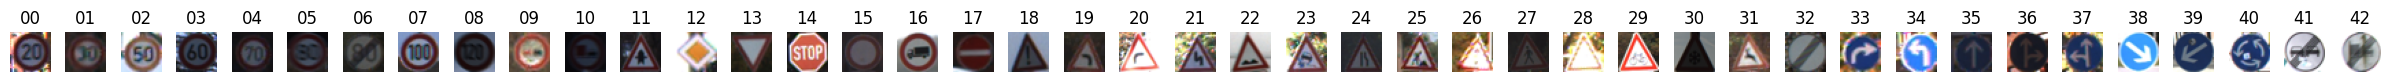

In [16]:
def plot_sample_images(features, labels):
    unique_labels = np.unique(labels)  # Get unique classes
    num_classes = len(unique_labels)

    plt.figure(figsize=(24, 6))
    for i, label in enumerate(unique_labels):
        # Find the first index of the current label
        index = np.where(labels == label)[0][0]

        # Reshape the flattened image back to the original size
        image = features[index].reshape(30, 30, 3)

        # Plot the image
        plt.subplot(1, num_classes, i + 1)
        plt.imshow(image.astype("uint8"))  # Convert to uint8 for proper visualization
        plt.title(label)  # Set the title as the class label
        plt.axis("off")

    plt.tight_layout()  # Adjust spacing
    plt.show()

# Call the function with the features and labels
plot_sample_images(features, labels)


#### Plot the distribution of Classes

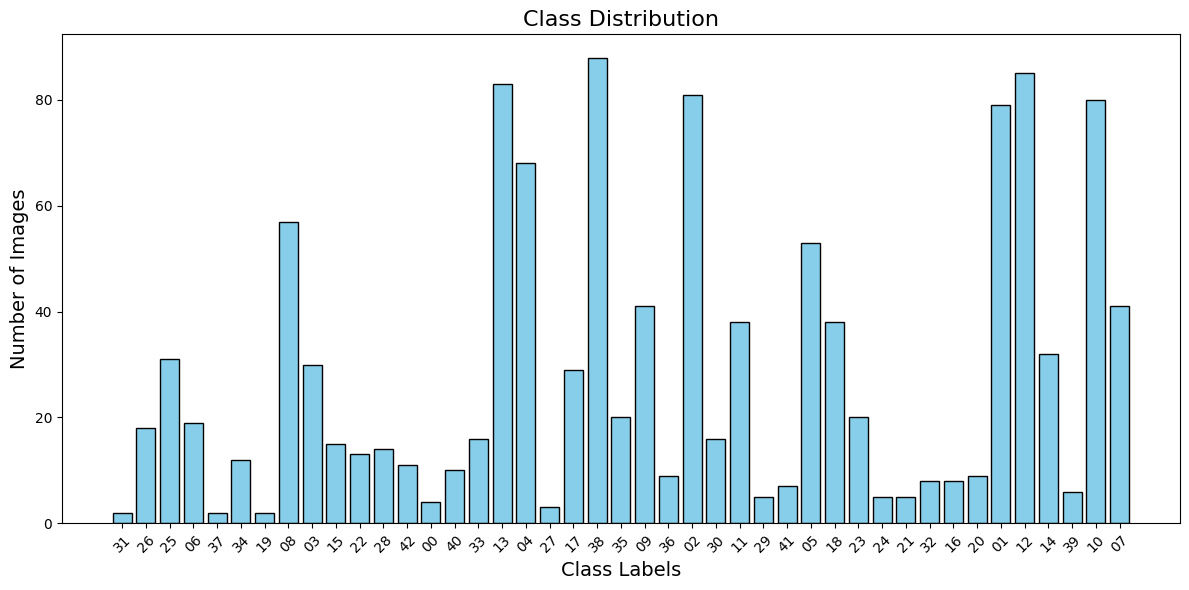

In [20]:
def plot_class_distribution(labels):
    # Count the occurrences of each class
    class_counts = Counter(labels)

    classes = list(class_counts.keys())
    counts = list(class_counts.values())

    # Plot the bar chart
    plt.figure(figsize=(12, 6))
    plt.bar(classes, counts, color='skyblue', edgecolor='black')
    plt.title("Class Distribution", fontsize=16)
    plt.xlabel("Class Labels", fontsize=14)
    plt.ylabel("Number of Images", fontsize=14)
    plt.xticks(rotation=45)
    #plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

plot_class_distribution(labels)

#### Normalize the features

For most image data, the pixel values are integers with values between 0 and 255.

Neural networks process inputs using small weight values, and inputs with large integer values can disrupt or slow down the learning process. As such it is good practice to normalize the pixel values.

Hint: sklearn.preprocessing.normalize

In [23]:
features = preprocessing.normalize(features, norm="l2")
features.shape

(1213, 2700)

### Train the MLP classifier on features (1 point)

* Split the data into train and test

* Train the MLP classifier with different parameters

* Get the accuracy score and performance metrics

In [29]:
# split data into train and test
X = features
y = labels
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

# MLP classifier with different parameters
mlp = MLPClassifier(activation='relu',
                    max_iter=2000,
                    hidden_layer_sizes=(150),
                    solver='adam',
                    random_state=2
                    )
mlp.fit(X_train, y_train)

# accuracy score and performance metrics
pred = mlp.predict(X_test)
print("Accuracy score: ", mlp.score(X_test, y_test))
#print("Confusion Matrix: \n", pd.crosstab(y_test, pred, rownames=['True'], colnames=['Predicted'], margins=True))

Accuracy score:  0.8518518518518519


### Tune the hyper-parameters (2 points)

* Use the GridSearchCV or RandomizedSearchCV and select best parameters

  Hint: [GridSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html), [RandomizedSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RandomizedSearchCV.html)

  (or)
* Manually change and find the best parameters

To know about all the parameters, click [here](https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html)

In [ ]:
# YOUR CODE HERE

#### Try the different algorithms and compare the results with MLP classifier

In [ ]:
# YOUR CODE HERE

### Implement simple Neural Networks using keras (3 points)

* Define the keras model and initialize the layers
  - Ensure the input layer has the right number of input features. This can be specified when creating the first layer with the input_dim argument.
* Compile the model
  - Specify the loss function (to evaluate a set of weights), the optimizer (is used to search through different weights for the network) and any optional metrics to collect and report during training.
* Fit and Evaluate the model
  - Fit the data by specifying epochs and evaluate the model

In [ ]:
print(tf.__version__)

In [ ]:
# Step 1 - Build the architecture
# YOUR CODE HERE

In [ ]:
# Step 2 - Compile the model
# YOUR CODE HERE

In [ ]:
# Step 3 - Fit and Evaluate the model
# YOUR CODE HERE

#### Try the same parameters used for MLP Classifier and build the keras model

In [ ]:
# YOUR CODE HERE

#### Experiment using Dropout, Regularization and Batch Normalization

In [ ]:
# YOUR CODE HERE

### Report Analysis

* According to the confusion matrix, for which sign were the maximum misclassifications observed? Comment on the misclassification, owing to similar appearing traffic signs, if any.
* Comment on the performance of the MLP Classifier
* Discuss the optimal number of layers, activation functions, optimizers etc. that yielded the best accuracy
* Report on training time vs convergence

Reference: J. Stallkamp, M. Schlipsing, J. Salmen, and C. Igel. The German Traffic Sign Recognition Benchmark: A multi-class classification competition. In Proceedings of the IEEE International Joint Conference on Neural Networks, pages 1453–1460. 2011.